In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

0.008321278795811519
ACC_DEVIATION=0.0015427917859874068
BARO_DEVIATION=0.27743675643533533


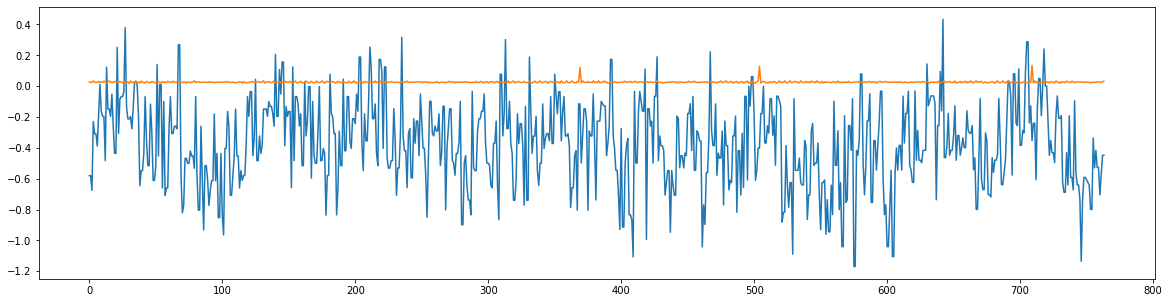

In [3]:
data = pd.read_csv("height_static.csv", delimiter=";")

print(data.acc_z.mean())

ACC_DEVIATION = data.acc_z.std()
BARO_DEVIATION = data.barometer.std()

print(f'{ACC_DEVIATION=}')
print(f'{BARO_DEVIATION=}')

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.plot(data.barometer)
ax.plot(data.ultrasound)
plt.show()


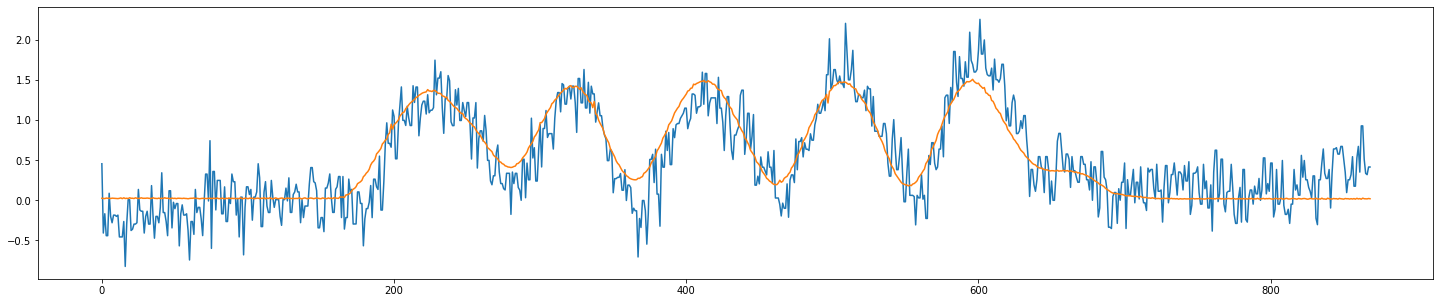

In [4]:
data = pd.read_csv("height_dynamic.csv", delimiter=";")

fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
ax.plot(data.barometer)
ax.plot(data.ultrasound)
plt.show()

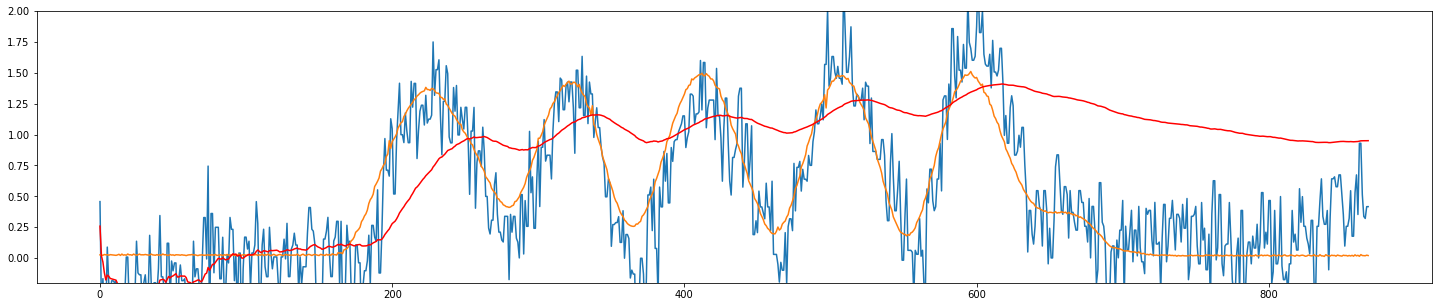

In [6]:
from filterpy.kalman import KalmanFilter

PERIOD = 0.025

COVARIANCE = 0.1

BARO_VAR = BARO_DEVIATION * BARO_DEVIATION
ACC_VAR  = ACC_DEVIATION * ACC_DEVIATION

f = KalmanFilter(dim_x=2, dim_z=1, dim_u=1)
f.x = np.array([0., 0.])                            # Initial state
f.B = np.array([PERIOD * PERIOD / 2, PERIOD])       # Control matrix
f.F = np.array([[1., PERIOD], [0., 1.]])            # State evolution matrix
f.H = np.array([[1.,0.]])                           # Observation matrix
f.P *= COVARIANCE                                   # Covariance matrix
f.R = np.array(BARO_VAR)                            # Measure noise matrix
f.Q = np.array([[ACC_VAR * (PERIOD ** 4) / 4,       # Process noise matrix
                 ACC_VAR * (PERIOD ** 3) / 2],
                [ACC_VAR * (PERIOD ** 3) / 2,
                 ACC_VAR * (PERIOD ** 2)]])

z_predict = np.zeros(len(data))

for i in range(len(data)):
    f.predict(u=data.acc_z[i])
    f.update(z=np.array([data.barometer[i]]))
    z_predict[i] = f.x[0]

fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
ax.set_ylim([-.2, 2.])
ax.plot(data.barometer)
ax.plot(data.ultrasound)
ax.plot(z_predict, 'r')
plt.show()
